In [2]:
import gzip
import numpy as np
import TensorFlow

#from keras.models import Sequential
#from keras.layers import Dense
#from keras.utils import to_categorical

ModuleNotFoundError: No module named 'TensorFlow'

In [ ]:
#Funktion zum Laden der einzelnen Bilder
def open_images(filename):
    #öffnen der gzip-Datein
    with gzip.open(filename, "rb") as file:
        #Laden aller daten
        data = file.read()
        #Schreiben der Daten in ein Numpy Array und Rückgabe des Arrays
        return np.frombuffer(data, dtype=np.uint8, offset=16)\
            .reshape(-1,28,28)\
            .astype(np.float32)
    
def open_labels(filename):
    with gzip.open(filename,"rb") as file:
        data = file.read()
        return np.frombuffer(data,dtype=np.uint8,offset=8)

#erstellen der Daten arrays
X_train = open_images("../Kursmaterialien/data/fashion/train-images-idx3-ubyte.gz")
y_train = open_labels("../Kursmaterialien/data/fashion/train-labels-idx1-ubyte.gz")

X_test = open_images("../Kursmaterialien/data/fashion/t10k-images-idx3-ubyte.gz")
y_test = open_labels("../Kursmaterialien/data/fashion/t10k-labels-idx1-ubyte.gz")

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
model = Sequential()

#Hinzufuegen eines Layers mit Dense
#100 = Anzahl der Neuronen (frei gewaehlt)
#784 = Anzahl der Pixel pro Bild
model.add(Dense(100, activation="sigmoid", input_shape=(784,))) # Hidden - Layer
model.add(Dense(10,activation="sigmoid")) # Output - Layer - Die 10 repräsentiert die Anzahl der Ausgänge

#1. Parameter = Optimierung der Gewichtung über SGD (Stochastic Gradient Decent - Gradientenabstiegsverfahren)
#2. Parameter = Standardwert
model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
X_train.reshape(60000,784)

In [5]:
model.fit(
    X_train.reshape(60000,784),
    y_train,
    epochs=10, #Anzahl wie häufig die Epochen durchlaufen werden sollen
    batch_size=1000 #Nach 1000 Bildern werden die Gewichte aktualisiert
)

Epoch 1/10
60000/60000 [==============================] - 1s 11us/step - loss: 2.1317 - accuracy: 0.2210
Epoch 2/10
60000/60000 [==============================] - 1s 9us/step - loss: 1.8553 - accuracy: 0.4609
Epoch 3/10
60000/60000 [==============================] - 1s 10us/step - loss: 1.6317 - accuracy: 0.6035
Epoch 4/10
60000/60000 [==============================] - 1s 9us/step - loss: 1.4433 - accuracy: 0.6642
Epoch 5/10
60000/60000 [==============================] - 1s 8us/step - loss: 1.2933 - accuracy: 0.6959
Epoch 6/10
60000/60000 [==============================] - 1s 8us/step - loss: 1.1774 - accuracy: 0.7183
Epoch 7/10
60000/60000 [==============================] - 0s 8us/step - loss: 1.0846 - accuracy: 0.7338
Epoch 8/10
60000/60000 [==============================] - 1s 9us/step - loss: 1.0110 - accuracy: 0.7478
Epoch 9/10
60000/60000 [==============================] - 1s 10us/step - loss: 0.9516 - accuracy: 0.7572
Epoch 10/10
60000/60000 [==============================] - 1s

In [7]:
# -1 bedeutet bei numpy, dass alle Daten aus dem Array genommen werden sollen
model.evaluate(X_test.reshape(-1,784), y_test)

10000/10000 [==============================] - 0s 20us/step


[0.8960709859848023, 0.7551000118255615]

In [8]:
#Vorher:
# - ja / nein
# 10%     90%

model.predict(X_test.reshape(-1,784))

array([[0.00621887, 0.00494567, 0.00607139, ..., 0.10506377, 0.0352256 ,
        0.16954988],
       [0.02794134, 0.01148029, 0.2956553 , ..., 0.00414001, 0.03351915,
        0.007529  ],
       [0.02534632, 0.57782334, 0.02175696, ..., 0.01069574, 0.0142572 ,
        0.01511358],
       ...,
       [0.04333834, 0.00744598, 0.00361254, ..., 0.00916672, 0.10051695,
        0.0472307 ],
       [0.02056302, 0.4207318 , 0.01662347, ..., 0.00750777, 0.0143823 ,
        0.01563671],
       [0.00824732, 0.01226216, 0.00706314, ..., 0.20030342, 0.05055714,
        0.08544768]], dtype=float32)

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


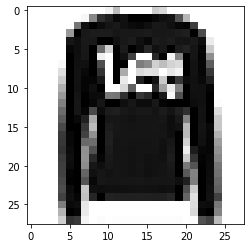

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt

print(y_test[1])

plt.imshow(X_test[1],cmap="gray_r")
plt.show()

In [10]:
pred = model.predict(X_test.reshape(-1,784))

In [11]:
pred[1]

array([0.02794134, 0.01148029, 0.2956553 , 0.01671869, 0.15023918,
       0.01171166, 0.13787024, 0.00414001, 0.03351915, 0.007529  ],
      dtype=float32)

In [12]:
np.argmax(pred[1])

2

In [13]:
np.argmax(pred,axis=1)

array([9, 2, 1, ..., 8, 1, 7], dtype=int64)

In [14]:
from pandas_ml import ConfusionMatrix

C:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


AttributeError: module 'sklearn.preprocessing' has no attribute 'Imputer'